# Interactive Graph Visualization

## Prerequisites

First, we need to set up our Python environment that has PyTorch, PyTorch Geometric and PathpyG installed. Depending on where you are executing this notebook, this might already be (partially) done. E.g. Google Colab has PyTorch installed by default so we only need to install the remaining dependencies. The DevContainer that is part of our GitHub Repository on the other hand already has all of the necessary dependencies installed. 

In the following, we install the packages for usage in Google Colab using Jupyter magic commands. For other environments comment in or out the commands as necessary. For more details on how to install `pathpyG` especially if you want to install it with GPU-support, we refer to our [documentation](https://www.pathpy.net/dev/getting_started/). Note that `%%capture` discards the full output of the cell to not clutter this tutorial with unnecessary installation details. If you want to print the output, you can comment `%%capture` out.

In [1]:
%%capture
# !pip install torch
!pip install torch_geometric
!pip install git+https://github.com/pathpy/pathpyG.git

## Motivation

This tutorial is specifically designed to guide you through the process of visualizing your data using `pathpyG`, an advanced data visualization tool. Data visualization is a crucial aspect of data analysis and interpretation, allowing for the transformation of complex datasets into visually appealing and easy-to-understand formats. pathpyG excels in this area by providing a range of functionalities that cater to both beginners and advanced users. Throughout this tutorial, you will be introduced to the basic and advanced features of pathpyG, empowering you to effectively visualize your data. This will not only enhance your understanding of your data but also enable you to communicate your findings more effectively to others.

Visualization is a core concept of `pathpyG` because it bridges the gap between raw data and meaningful visual representations. We, as humans, are wired to process visual information much more rapidly compared to text or audio. This innate ability enables us to quickly identify patterns, outliers, and trends in visual data. Data visualization leverages this capability by graphically representing data, thereby facilitating the swift interpretation of large and complex datasets. Interactive visualizations further this advantage by allowing users to directly engage with the data, exploring and analyzing it in an intuitive and insightful manner. Whether it's understanding the intricate details of microscopic structures or grasping the dynamics of global phenomena, visualizations are instrumental in helping researchers and analysts gain deeper insights and effectively communicate their findings.


## Learning objectives

In this tutorial, you will learn to master the art of creating simple yet powerful interactive visualizations using `pathpyG`. You will learn the nuances of customizing the style of your visualizations, enabling you to tailor them to your specific needs and preferences. This customization extends to the aesthetics, layout, and interactive elements, ensuring that your visualizations are not only informative but also engaging. Additionally, the tutorial covers the essential skills needed to save your visualizations in various formats, making it easier to share your work across different platforms and audiences. Lastly, a significant part of the tutorial is dedicated to creating temporal visualizations. These types of visualizations are particularly useful in understanding and presenting data that changes over time, offering dynamic insights into trends and patterns that static visualizations cannot capture. By the end of this tutorial, you will have a comprehensive understanding of how to effectively use pathpyG to create and customize a wide range of visualizations.

## Let's Get Started

To embark on our journey of visualizing data with `pathpyG`, the initial step involves initializing and loading the required modules, a crucial process that sets the foundation for our data visualization work. This preparation ensures that all necessary tools and functionalities from `pathpyG` are at our disposal. 

In anticipation of enhancing our graphs with additional attributes, we also include the `torch` package in our setup. `torch` is renowned for its robust capabilities in data processing and machine learning, and its inclusion allows us to enrich our graphs with more complex and informative attributes.

In [2]:
import pathpyG as pp
import torch
print('Running on', pp.config['torch']['device'])

Running on cpu


With these preparations complete, we are ready to construct our first graph. This is achieved through the `Graph.from_edge_list` constructor provided by `pathpyG`, a method that allows us to transform a list of edges into a basic graphical representation.

In [3]:
g = pp.Graph.from_edge_list([['a', 'b'], ['c','b']])
pp.plot(g, node_label=g.mapping.node_ids, edge_color='gray')

After successfully creating a simple graph using `pathpyG`, our next step is to examine its structure. This is a crucial part of the process as it gives us an initial understanding of the complexity and scale of our graph. By printing out the number of nodes and edges, we gain insight into the size and connectivity of the graph. 

Although it may seem unnecessary for this simple graph, it's good practice to gather information about the number of nodes and edges before attempting to visualize it. This preemptive step is crucial, especially when dealing with larger graphs. Visualizing extensive networks can be a time-consuming or even unfeasible task, depending on the sheer volume of elements that need to be represented. Therefore, understanding the graph's scale upfront helps in efficiently planning the visualization process and avoiding potential complications that could arise with larger datasets.

In [4]:
f'Our graph has {g.N} nodes and {g.M} edges.'

'Our graph has 3 nodes and 2 edges.'

## The `plot` Function

The `plot` function in `pathpyG` stands out as the simplest and most direct method for creating visualizations. Designed to encapsulate all the plotting capabilities of `pathpyG` in a single command, it streamlines the process of generating quick and efficient plots. This functionality is particularly beneficial for users who seek immediate visual feedback from their data without delving into more complex coding. The only prerequisite for using this function is the `Graph` object, which serves as the foundation for the visualization. Moreover, when working within an interactive environment, such as a `Jupyter notebook`, the `plot` function is particularly powerful. In such settings, invoking the `plot` command will automatically generate and display an interactive visualization. This feature is particularly beneficial as it allows for immediate visual feedback, making it an ideal tool for exploratory data analysis where quick and efficient visualization is key. 

In [5]:
pp.plot(g)

### `kwargs` in the `plot` function

In `pathpyG`, the customization of your plot is managed through keyword arguments (kwargs), where each customization is specified as a keyword followed by its corresponding value. This approach is what gives the `plot` function its remarkable flexibility, allowing it to adapt to a wide variety of plotting requirements. Whether you're aiming for a simple graph or a complex, multi-faceted visualization, the keyword arguments provide the tools to tailor your plot precisely to your needs. 

However, this wealth of options can be somewhat overwhelming for beginners, given the extensive range of available choices. But worry not, as we will guide you through the most essential and basic options, ensuring you have a solid foundation to start from. By mastering these fundamental aspects, you'll be well on your way to effectively utilizing `pathpyG`'s plot function, gradually building up to more advanced features as you gain confidence and expertise.


### Plotting Backends

In the diverse world of data visualization, there is no one-size-fits-all technique, as different scenarios demand different approaches. Recognizing this, `pathpyG` offers a variety of plotting backends, each tailored for specific use cases, ensuring that users have the right tools for their unique requirements. 

- For instance, `pathpyG` facilitates interactive visualizations, as previously demonstrated, which are immensely useful for dynamic exploration of data. This feature is particularly beneficial in educational settings, exploratory data analysis, and communication, where interaction with the data can lead to deeper understanding and insights. 

- On the other hand, `pathpyG` also integrates with matplotlib, a widely recognized package for creating static plots. This is especially efficient for visualizing large graphs where interactivity might be less critical. 

- Additionally, `pathpyG` caters to the academic and publication community by offering tikz plots, which are highly valued in formal publications for their precision and quality. (Note that for generating tikz plots, currently, the installation of `latexmk` is necessary to produce the corresponding `.tex` and `.pdf` files.)

Let's generate a static png image using the `matplotlib` backend:

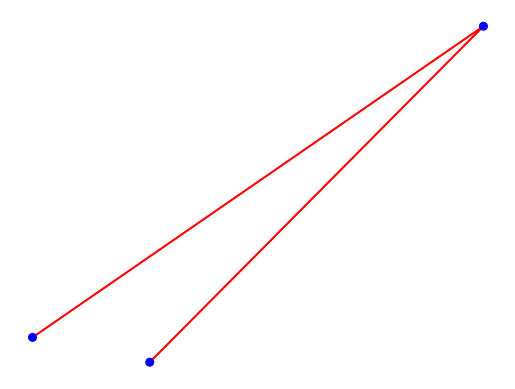

In [6]:
pp.plot(g,backend='matplotlib');

### Quick Introduction to Layouts

An important aspect to consider is the layout of your plot. The previous plot we generated is static, meaning the positions of the nodes are fixed and do not change. This fixed arrangement presents a unique challenge, as finding the optimal placement for nodes and edges to convey information effectively is not a straightforward task. To assist with this, `pathpyG` supports simple layout functions designed to create visually appealing and coherent graphs. By default, nodes are assigned random locations for computational efficiency. However, this arrangement can be significantly improved with the use of the `layout` keyword in the `plot` function, allowing for more structured and meaningful representations of your graph.

For example, `pathpyG` includes support for sophisticated layout algorithms, such as the Fruchterman-Reingold algorithm for force-directed layouts. This can be activated using the `"fr"` option, which applies a physics-based approach to arrange nodes and edges in a way that visually represents their relational dynamics. Such force-directed layouts are particularly useful for highlighting the underlying structure and relationships within the data.

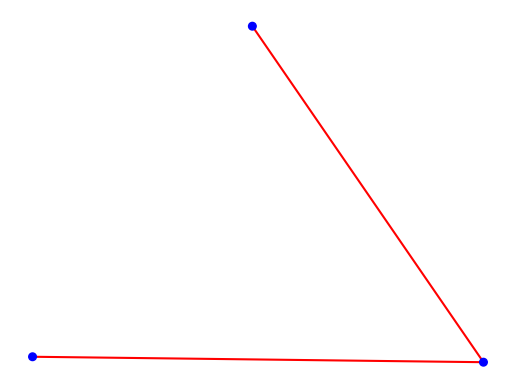

In [7]:
pp.plot(g,backend='matplotlib',layout='fr')

Additionally, `pathpyG` offers the flexibility to incorporate custom layout algorithms. If you have developed your own method or have specific requirements for node positioning, you can directly provide the node coordinates to the visualization. This capability ensures that `pathpyG` can cater to a wide range of visualization needs, from simple and automatic layouts to highly customized and complex arrangements, making it a versatile tool in the field of data visualization.

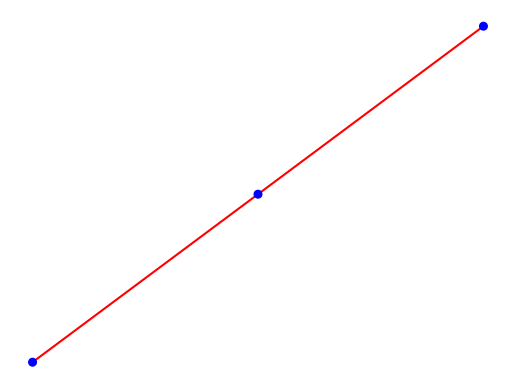

In [8]:
layout = {'a':[0,0],'b':[1,1],"c":[2,2]}
pp.plot(g,backend='matplotlib',layout=layout)

## Styling Your Plots

To enhance the effectiveness and appeal of our visualizations in `pathpyG`, styling of our plots becomes a key aspect. The ability to style your plots is not just about aesthetic appeal; it is about effectively conveying more information through visual means. Depending on the type of plot you are working with, there are multiple styling options available to tailor your visualization to your specific needs. The fundamental principle here is that the styles applied to your plot should not be dependent on the data of your model. In other words, you should be able to present the same data in different styles, depending on the context or the information you wish to highlight. To facilitate this, styles are organized in dictionaries, which are then incorporated into the `plot` function. 

For network plots, where the focus is on the topology of the data, there are several basic styling options you can adjust, including the `size`, `color`, and `opacity` of each node and edge object. These options provide a foundational level of customization, allowing you to make your graph more readable and visually appealing. However, the styling possibilities extend further, varying according to the specific kind of plot you are creating. To distinguish between the styling of edges and nodes, a prefix corresponding to each element type is added to the keyword, such as `node_size`. This distinction ensures that your styling choices are accurately applied to the intended elements of the graph, further enhancing the clarity and effectiveness of your visualization. 

In [9]:
style = {}
style['node_color'] = (255,1,255) # RGB tuple
style['edge_color'] = 'green'     # Color name as str
pp.plot(g,**style)

In `pathpyG`, there are various methods for assigning styles to objects, each offering a different level of customization and control. A straightforward approach, as previously shown, involves using a single value, such as a color string (e.g., `'green'`) or an RGB tuple (e.g., `(255,1,255)`). Applying this single value uniformly alters the appearance of all elements within a specific category, providing a quick and easy way to set a general style. However, for more detailed styling, one can utilize a `list` of values. In this approach, each value in the `list` is associated with an element according to its index position. This method is particularly familiar and efficient when working with tensors, where the association of values to elements is often index-based.

Additionally, a more tailored approach can be employed through the use of dictionaries. In this case, each element id is paired with a corresponding value in the `dict`. Elements not included in the dictionary are assigned default values, ensuring that every element is styled, albeit some with custom and others with default styles. The types of values that can be used in these styling methods are diverse, including strings, integers, floats, and tuples, each type depending on the specific styling parameter being adjusted. This flexibility in value types and assignment methods allows for a high degree of customization, enabling the creation of visually distinct and information-rich visualizations. 

In [10]:
style = {}
style['node_color'] = ['red', 'green','blue'] # list based approach
style['node_size'] = {"a":40,"b":10, "c":25}  # dict based approach
style['node_opacity'] = {"b":.5,"c":.3}       # missing dict value
style['edge_color'] = ['orange','#00FF00']    # hex based color
pp.plot(g,**style)

### Colormaps

In many instances, particularly when visualizing numerical data, the use of color gradients to represent values can greatly enhance the clarity and effectiveness of a plot. `pathpyG` addresses this need through its native support for `colormaps`. When the colors of node or edge elements are defined using `int` or `float` values, `pathpyG` automatically assigns colors based on these colormaps, effectively interpolating the correct color value for each element. By default, `pathpyG` offers a simple colormap that transitions from red to green, sufficient for many basic visualization needs. However, for more customized or advanced styling, users have the option to utilize any colormap from the extensive color palettes provided by `matplotlib` or `seaborn`. These libraries offer a wide range of color schemes, enabling you to select the perfect palette to convey the nuances of your data. 

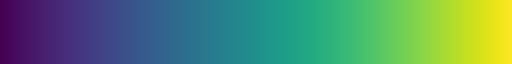

In [11]:
from matplotlib.pyplot import get_cmap
my_map = get_cmap()
my_map

In [12]:
style = {}
style['edge_color'] = [1, 9]      # int values

style['node_color'] = pp.algorithms.centrality.betweenness_centrality(g)
style['node_cmap'] = my_map       # new color map from matplotlib for nodes
pp.plot(g,**style)

## Saving Plots

In `pathpyG`, sharing your plots or incorporating them into various mediums is facilitated by the ability to save them as files. This functionality is conveniently accessed by simply adding the `filename` keyword within the plot function. When you specify a filename, `pathpyG` assigns the appropriate backend to use based on the file extension provided. For instance, if you save your file with an `.html` extension, `pathpyG` generates a standalone interactive visualization, perfect for web applications or interactive presentations. On the other hand, if you choose to save your plot as a `.png` file, a static image is created using the `matplotlib` backend, ideal for including in documents, reports, or presentations where interactivity is not required. Additionally, for those seeking to incorporate plots into academic papers or publications, saving the file with a `.tex` extension activates the `tikz` backend. This feature is particularly beneficial for creating high-quality, publication-ready figures. 

In [13]:
pp.plot(g,filename='test_plot.html')

## Larger Network Visualizations

Having covered the basics, we are now well-prepared to venture into the realm of larger network visualizations using `pathpyG`. 

In [14]:
n = pp.io.read_netzschleuder_network('karate', '77')

In [15]:
pp.plot(n)

In [16]:
node_color = [n['node_groups',v][0] for v in n.nodes]
pp.plot(n, edge_color='gray',node_color=node_color)

## Temporal Network Visualizations

In the realm of network analysis, `pathpyG` particularly excels in handling and visualizing temporal graphs, a domain where both nodes and edges can change their properties over time. This dynamic aspect of temporal graphs adds a layer of complexity and richness to data analysis, capturing the evolution of relationships and properties within the network. `pathpyG` supports this advanced functionality, allowing users to apply the same versatile `plot` function used for static graphs to `TemporalGraph` data structures. This integration means that all the customization options, styling features, and layout choices previously explored for static network visualizations are also applicable to temporal graphs. The ability to utilize these tools in the context of temporal data opens up a world of possibilities for in-depth analysis and insightful visualization of networks where time plays a crucial role. Whether you're tracking changes in social networks, analyzing traffic patterns, or studying dynamic biological systems, `pathpyG`'s capabilities in temporal network visualization provide a powerful tool to uncover and illustrate the temporal dynamics inherent in these complex systems.

In [17]:
t = pp.TemporalGraph.from_edge_list(
        [
            ("a", "b", 1),
            ("b", "c", 5),
            ("c", "d", 9),
            ("d", "a", 9),
            ("a", "b", 10),
            ("b", "c", 10),
        ]
    )

In [18]:
pp.plot(t)

Besides the standard formatting options available in `pathpyG`, temporal plots come with specific options tailored to their unique nature. These specialized settings allow for precise control over the time dimension of the visualization. With the `start` and `end` parameters, you can define the exact start time and end time of the simulation, effectively setting the temporal boundaries of your graph. This feature is crucial for focusing on a particular time frame within your dataset. Additionally, the `delta` option lets you adjust the progression speed through the time steps of your visualization. Here, a value of 1000 translates to a one-second interval, providing a way to calibrate the pace at which the temporal data unfolds. Moreover, the `interval` option offers the flexibility to either widen or narrow the time intervals considered in the visualization. This feature is particularly useful for either zooming in on finer time-scaled details or zooming out for a broader, more comprehensive view of the temporal dynamics in your network.

In [19]:
color = {"a": "blue", "b": "red", "c": "green", "d": "yellow"}
pp.plot(t,node_color=color,start=-1,end=25,delta=1000)